# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

# Load Dataset

In [3]:
df = pd.read_csv("../data/data.csv")

# Basic Overview

In [4]:
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
display(df.head())


Shape of dataset: (95662, 16)

Data types:
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


# Convert TransactionStartTime to datetime

In [5]:
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'], errors='coerce')
print("\nConverted TransactionStartTime to datetime.")


Converted TransactionStartTime to datetime.


# Summary Statistics

In [6]:
display(df.describe(include='all'))

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
count,95662,95662,95662,95662,95662,95662,95662.0,95662,95662,95662,95662,9.566200e+04,9.566200e+04,95662,95662.000000,95662.000000
unique,95662,94809,3633,3627,3742,1,NaN,6,23,9,4,NaN,NaN,NaN,NaN,NaN
top,TransactionId_35670,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_3,NaN,NaN,NaN,NaN,NaN
freq,1,28,30893,32630,4091,95662,NaN,38189,32635,45405,56935,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,6.717846e+03,9.900584e+03,2019-01-02 01:15:52.886433536+00:00,2.255974,0.002018
min,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-1.000000e+06,2.000000e+00,2018-11-15 02:18:49+00:00,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-5.000000e+01,2.750000e+02,2018-12-12 09:47:57.750000128+00:00,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,1.000000e+03,1.000000e+03,2018-12-31 17:20:45+00:00,2.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,2.800000e+03,5.000000e+03,2019-01-25 10:54:47.500000+00:00,2.000000,0.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,9.880000e+06,9.880000e+06,2019-02-13 10:01:28+00:00,4.000000,1.000000


# Numerical Distribution

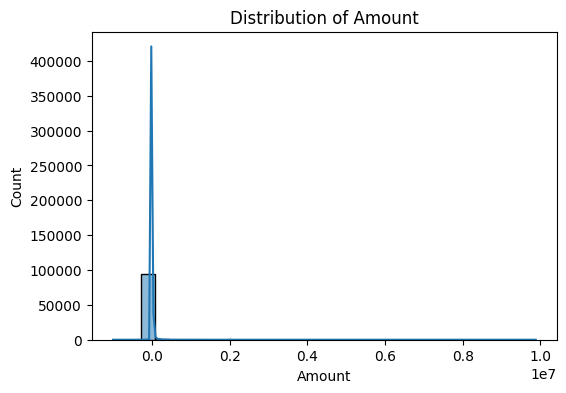

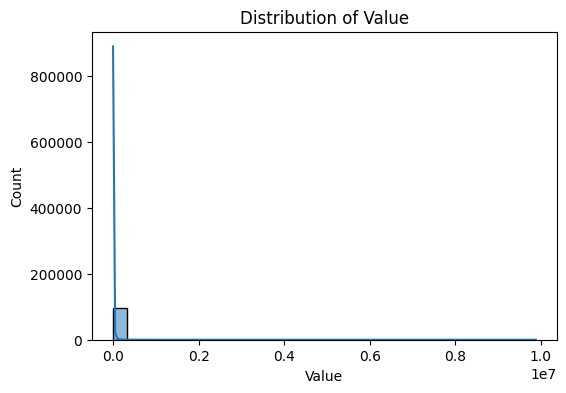

In [7]:
numerical_cols = ['Amount', 'Value']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Categorical Feature Distribution

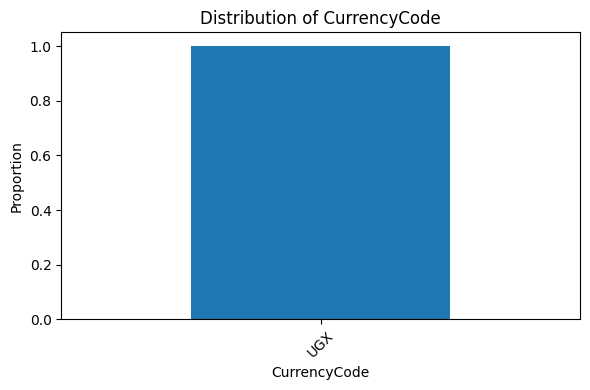

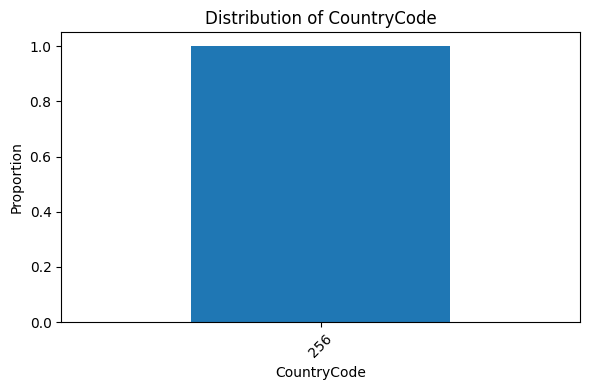

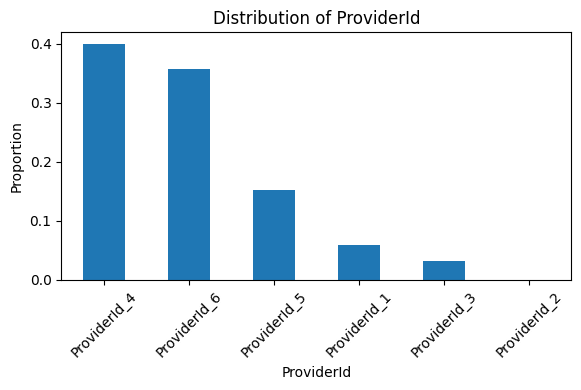

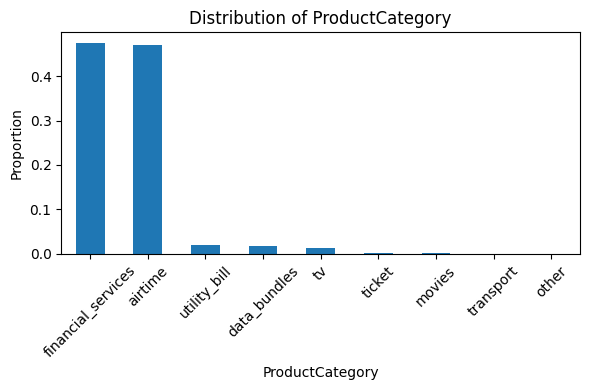

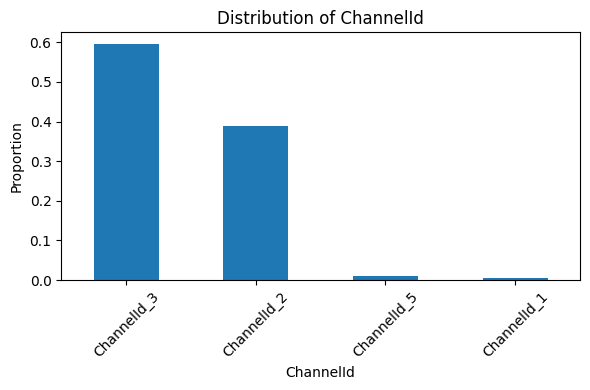

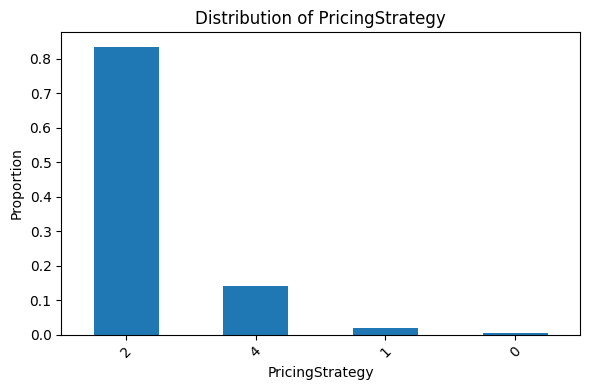

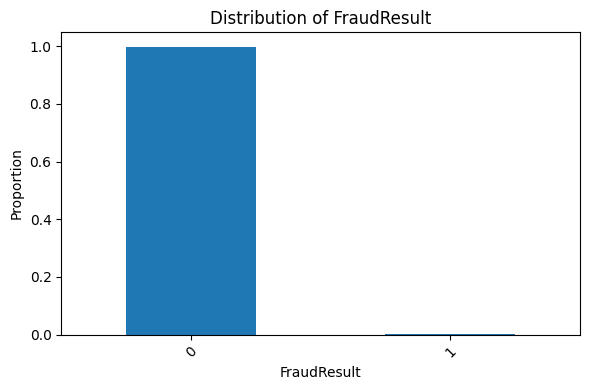

In [8]:
categorical_cols = ['CurrencyCode', 'CountryCode', 'ProviderId', 'ProductCategory', 
                    'ChannelId', 'PricingStrategy', 'FraudResult']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Correlation Matrix


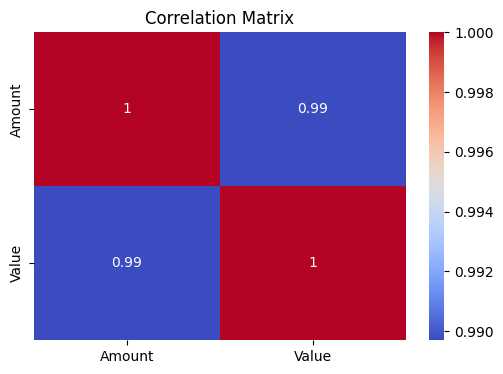

In [9]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Missing Values

Missing Values:
 TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


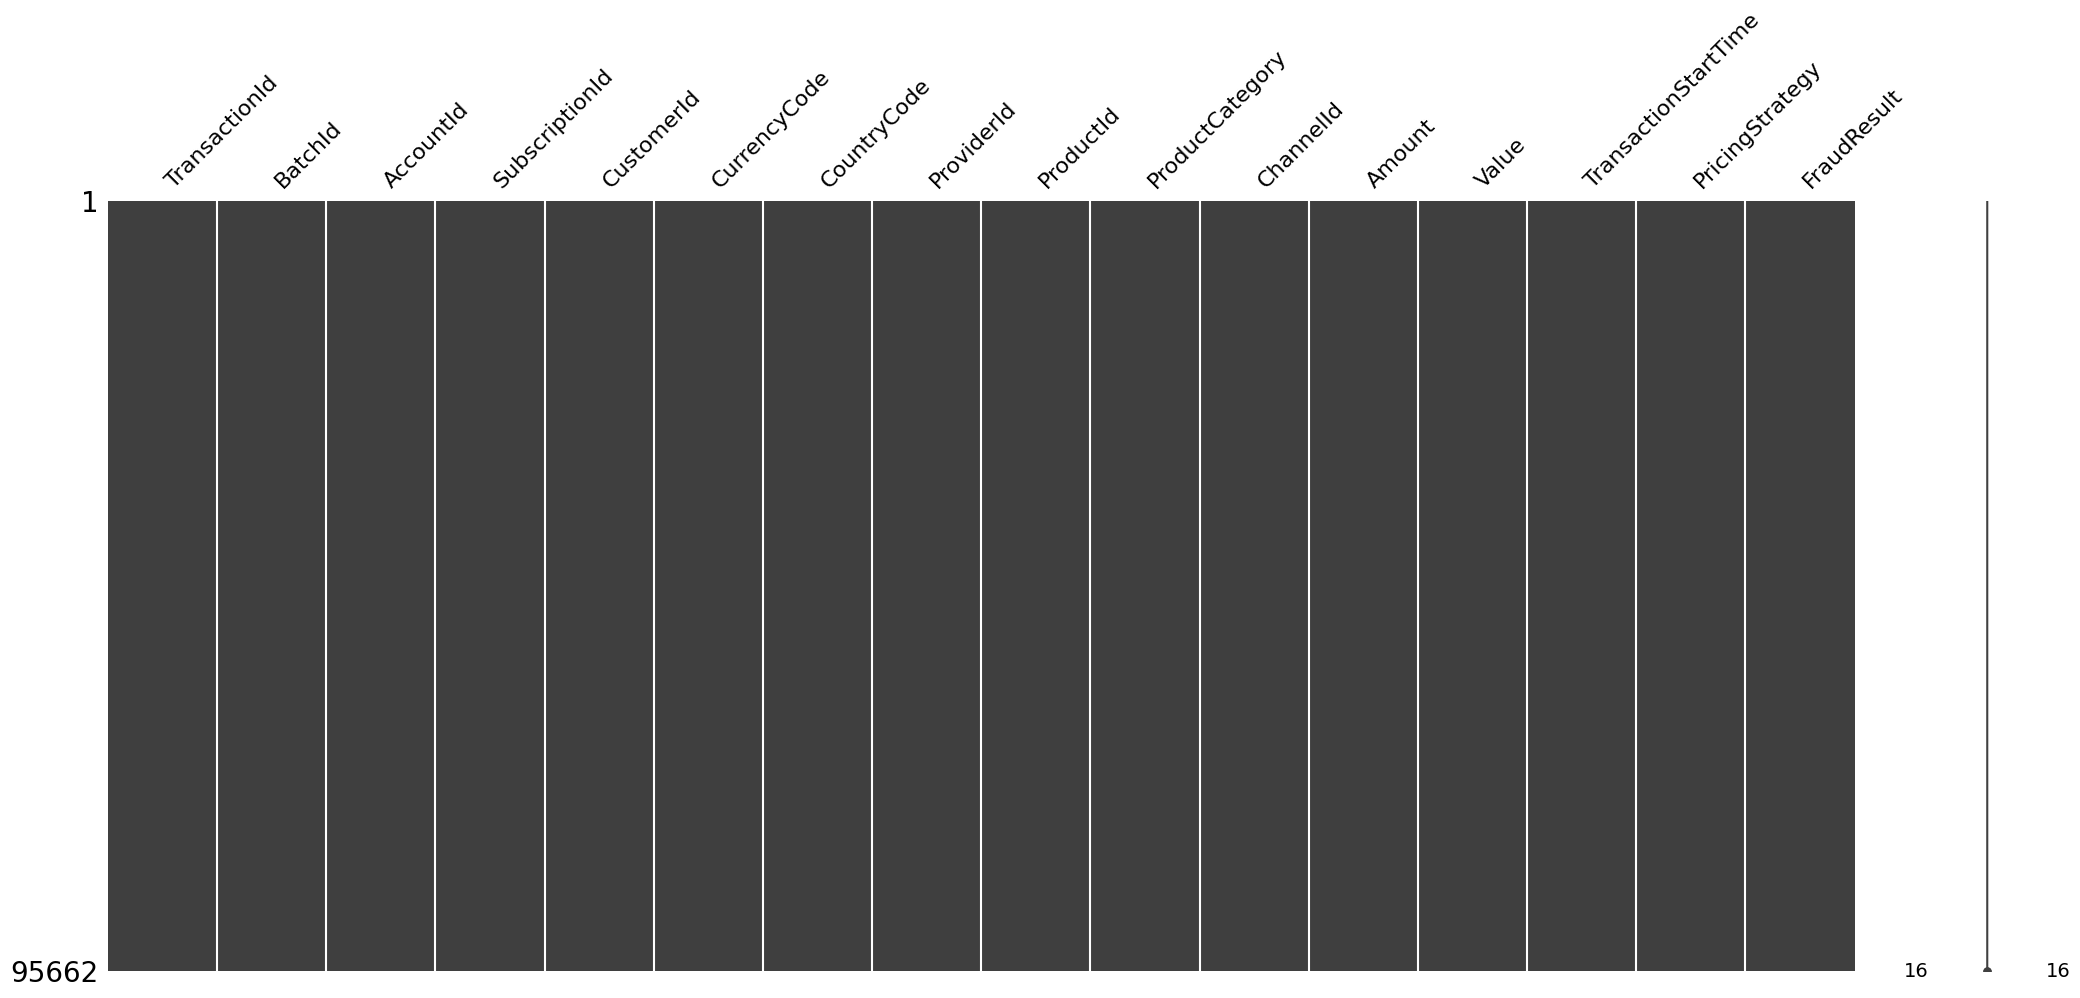

In [10]:
print("Missing Values:\n", df.isnull().sum())
msno.matrix(df)
plt.show()

# Outlier Detection

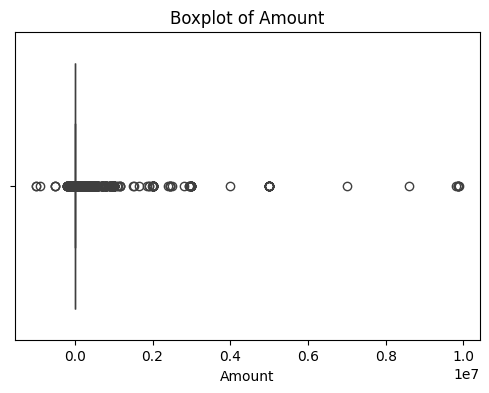

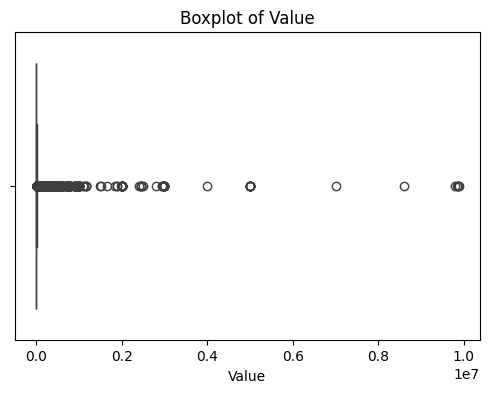

In [11]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


# Time-Based Analysis

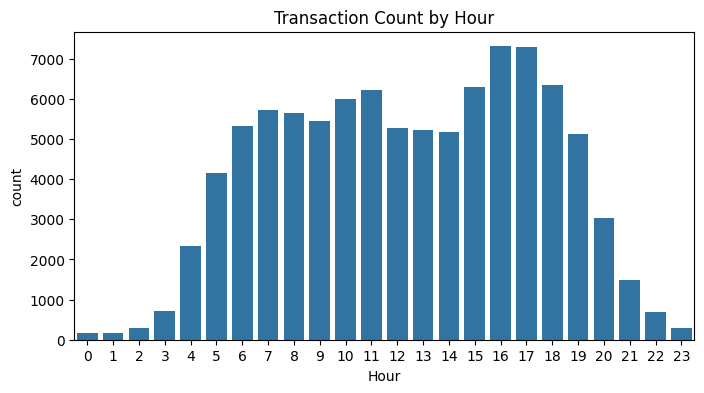

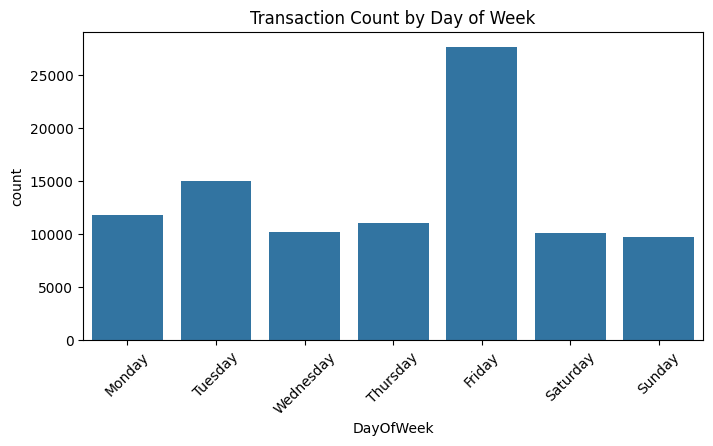

In [12]:
df['Hour'] = df['TransactionStartTime'].dt.hour
df['DayOfWeek'] = df['TransactionStartTime'].dt.day_name()

plt.figure(figsize=(8, 4))
sns.countplot(x='Hour', data=df)
plt.title('Transaction Count by Hour')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x='DayOfWeek', data=df, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Transaction Count by Day of Week')
plt.xticks(rotation=45)
plt.show()

# Fraud by Time

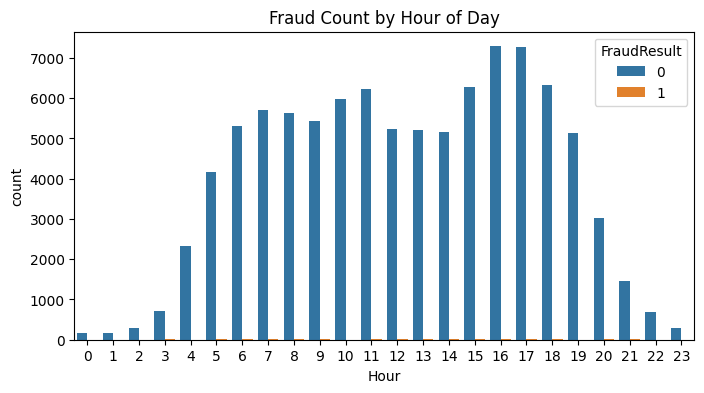

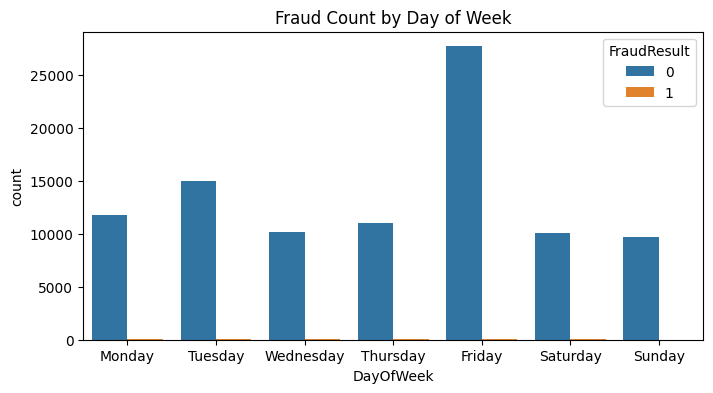

In [13]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Hour', hue='FraudResult', data=df)
plt.title('Fraud Count by Hour of Day')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x='DayOfWeek', hue='FraudResult', data=df,
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Fraud Count by Day of Week')
plt.show()

# Summary of Key Insights (Markdown Cell in Jupyter recommended)


In [14]:
from IPython.display import Markdown as md
md("""
### 📌 Key EDA Insights

1. **Skewed Features**: `Amount` and `Value` are right-skewed; may need transformation.
2. **Temporal Patterns**: Fraud transactions show clustering at certain hours or days.
3. **Class Imbalance**: `FraudResult` is imbalanced — resampling techniques needed.
4. **Outliers Detected**: High-value outliers visible in `Amount` and `Value`.
5. **Missing Data**: Some nulls in timestamp and possibly other fields to handle.
""")


### 📌 Key EDA Insights

1. **Skewed Features**: `Amount` and `Value` are right-skewed; may need transformation.
2. **Temporal Patterns**: Fraud transactions show clustering at certain hours or days.
3. **Class Imbalance**: `FraudResult` is imbalanced — resampling techniques needed.
4. **Outliers Detected**: High-value outliers visible in `Amount` and `Value`.
5. **Missing Data**: Some nulls in timestamp and possibly other fields to handle.
